In [11]:
import pandas as pd
df = pd.read_csv(r'C:\Users\rajar\Downloads\taxi_with_weather (1).csv')
print(df)

C:\Users\rajar\AppData\Local\Temp\ipykernel_7900\2812692842.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\rajar\Downloads\taxi_with_weather (1).csv')


         VendorID tpep_pickup_datetime         tpep_dropoff_datetime  \
0               2  2024-01-01 00:57:55  Mon Jan 01 01:17:43 UTC 2024   
1               1  2024-01-01 00:03:00  Mon Jan 01 00:09:36 UTC 2024   
2               1  2024-01-01 00:17:06  Mon Jan 01 00:35:01 UTC 2024   
3               1  2024-01-01 00:36:38  Mon Jan 01 00:44:56 UTC 2024   
4               1  2024-01-01 00:46:51  Mon Jan 01 00:52:57 UTC 2024   
...           ...                  ...                           ...   
3687060         2  2024-01-31 23:45:59  Wed Jan 31 23:54:36 UTC 2024   
3687061         1  2024-01-31 23:13:07  Wed Jan 31 23:27:52 UTC 2024   
3687062         2  2024-01-31 23:19:00  Wed Jan 31 23:38:00 UTC 2024   
3687063         2  2024-01-31 23:07:23  Wed Jan 31 23:25:14 UTC 2024   
3687064         1  2024-01-31 23:58:25  Thu Feb 01 00:13:30 UTC 2024   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                    1.0           1.72         1.0          

In [14]:
null_counts = df.isnull().sum()
print(null_counts)

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
pickup_hour              0
Time                     0
Temperature              0
Dew Point                0
Humidity                 0
Wind                     0
Wind Speed               0
Wind Gust                0
Pressure                 0
Precip.                  0
Condition                0
Date                     0
Time_24h                 0
dtype: int64


In [15]:
# Remove rows with any null values
df = df.dropna()
null_counts = df.isnull().sum()

# Display null values count for each column
print(null_counts)
df.shape

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
pickup_hour              0
Time                     0
Temperature              0
Dew Point                0
Humidity                 0
Wind                     0
Wind Speed               0
Wind Gust                0
Pressure                 0
Precip.                  0
Condition                0
Date                     0
Time_24h                 0
dtype: int64


(3349672, 32)

In [16]:
weather_mapping = {"Cloudy":1,
"Light Rain":2,
"Mostly Cloudy":3,
"Partly Cloudy":4,
"Fair":5,
"Mostly Cloudy / Windy":6,
"Light Snow":7,
"Fair / Windy":8,
"Rain":9,
"Light Rain / Windy":10,
"Heavy Rain / Windy":11,
"Wintry Mix":12,
"Cloudy / Windy":13,
"Light Snow / Windy":14,
"Fog":15,
"Light Drizzle": 16,
"Drizzle and Fog":17,
"Mist":18,
"Light Freezing Rain":19,
"Heavy Rain":20,
"Rain / Windy":21,
"Light Snow and Sleet":22,
}
df['Condition_Code'] = df['Condition'].map(weather_mapping)

print(df)


         VendorID tpep_pickup_datetime         tpep_dropoff_datetime  \
0               2  2024-01-01 00:57:55  Mon Jan 01 01:17:43 UTC 2024   
1               1  2024-01-01 00:03:00  Mon Jan 01 00:09:36 UTC 2024   
2               1  2024-01-01 00:17:06  Mon Jan 01 00:35:01 UTC 2024   
3               1  2024-01-01 00:36:38  Mon Jan 01 00:44:56 UTC 2024   
4               1  2024-01-01 00:46:51  Mon Jan 01 00:52:57 UTC 2024   
...           ...                  ...                           ...   
3513391         2  2024-01-31 23:15:08  Wed Jan 31 23:29:33 UTC 2024   
3513392         2  2024-01-31 23:10:28  Wed Jan 31 23:18:30 UTC 2024   
3513393         2  2024-01-31 23:01:04  Wed Jan 31 23:17:35 UTC 2024   
3513394         1  2024-01-31 23:08:13  Wed Jan 31 23:25:00 UTC 2024   
3513396         2  2024-01-31 23:03:26  Wed Jan 31 23:09:12 UTC 2024   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                    1.0           1.72         1.0          

In [17]:
condition_to_change = [2,7,9,10,11,14,19,20,21,22]

# Create a new column where the fare amount increases by 10% if the condition matches
df['new_fare_amount'] = df.apply(lambda row: row['total_amount'] * 1.10 if row['Condition_Code'] == condition_to_change else row['total_amount'],axis=1)

print(df.describe())


           VendorID  passenger_count  trip_distance    RatecodeID  \
count  3.349672e+06     3.349672e+06   3.349672e+06  3.349672e+06   
mean   1.756687e+00     1.335010e+00   3.253785e+00  2.191964e+00   
std    4.290826e-01     8.473858e-01   1.128101e+01  1.039865e+01   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    2.000000e+00     1.000000e+00   1.000000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.660000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.100000e+00  1.000000e+00   
max    2.000000e+00     9.000000e+00   1.540032e+04  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  3.349672e+06  3.349672e+06  3.349672e+06  3.349672e+06  3.349672e+06   
mean   1.662533e+02  1.654007e+02  1.220229e+00  1.815248e+01  1.465461e+00   
std    6.336097e+01  6.908595e+01  5.340385e-01  1.926076e+01  1.803307e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00 -8.990000e+02 

In [18]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Extracting features from pickup_time
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_minute'] = df['tpep_pickup_datetime'].dt.minute
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Extracting features from drop_time
df['drop_hour'] = df['tpep_dropoff_datetime'].dt.hour
df['drop_minute'] = df['tpep_dropoff_datetime'].dt.minute
df['drop_dayofweek'] = df['tpep_dropoff_datetime'].dt.dayofweek  # Monday=0, Sunday=6

In [19]:
features=['VendorID','pickup_hour','drop_hour','trip_distance','passenger_count','PULocationID','DOLocationID','payment_type','Condition_Code']
x=df[features]
y=df['new_fare_amount']

In [20]:
import numpy as np

def quantile_normalize(df):
    sorted_df = pd.DataFrame(np.sort(df.values, axis=0), index=df.index, columns=df.columns)
    rank_means = sorted_df.mean(axis=1)
    rank_dict = {rank: mean for rank, mean in enumerate(rank_means)}
    return df.rank(method="min").stack().astype(int).map(rank_dict).unstack()

quantile_normalized_data = quantile_normalize(x) - 0.5

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(quantile_normalized_data,y,test_size=0.20,random_state=0)

In [22]:
import numpy as np

# Check for NaNs or Infinities in the data
print(np.any(np.isnan(x_train)))
print(np.any(np.isinf(x_train)))
print(np.any(np.isnan(y_train)))
print(np.any(np.isinf(y_train)))

True
False
False
False


In [23]:
# Remove NaNs from both x_train and y_train simultaneously based on x_train's NaN values
mask = ~np.isnan(x_train).any(axis=1)
x_train = x_train[mask]
y_train = y_train.loc[x_train.index]  # Use .loc to align indices

# Repeat for infinite values
mask = ~np.isinf(x_train).any(axis=1)
x_train = x_train[mask]
y_train = y_train.loc[x_train.index]  # Use .loc to align indices

# Fill NaNs with the mean of each feature in x_train (if still needed)
x_train = np.where(np.isnan(x_train), np.nanmean(x_train, axis=0), x_train)

# Alternatively, fill with a constant value like zero
x_train = np.nan_to_num(x_train, nan=0.0)

In [24]:
# Check lengths
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# If they have different lengths, investigate why

x_train shape: (2657340, 9)
y_train shape: (2657340,)


In [25]:
import numpy as np

# Check for NaNs or Infinities in the data
print(np.any(np.isnan(x_train)))
print(np.any(np.isinf(x_train)))
print(np.any(np.isnan(y_train)))
print(np.any(np.isinf(y_train)))

False
False
False
False


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, BatchNormalization,Dense,LeakyReLU
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential


model = Sequential()
model.add(Dense(200, input_shape=(9,)))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dense(200))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.3))
model.add(Dense(200))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dense(200))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.3))
model.add(Dense(200))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dense(200))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.3))
model.add(Dense(200))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001
)

#Use an optimizer like Adam
optimizer = Adam()
def pseudo_huber_loss(delta=1.0):
    def loss(y_true, y_pred):
        error = y_pred - y_true
        return tf.reduce_mean(delta**2 * (tf.sqrt(1 + (error / delta)**2) - 1))
    return loss

# Pass the optimizer to the compile method and the callback to fit
model.compile(optimizer=optimizer, loss= pseudo_huber_loss(delta=1.0), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=32, callbacks=[lr_reduction])

In [4]:
import joblib
from keras.models import Sequential

model_json = model.to_json()
with open('model_architecture1.json', 'w') as json_file:
    json_file.write(model_json)
joblib.dump(model.get_weights(), 'model_weights1.joblib')


NameError: name 'model' is not defined

In [26]:
import joblib
from keras.models import model_from_json

def pseudo_huber_loss(delta=1.0):
    def loss(y_true, y_pred):
        error = y_pred - y_true
        return tf.reduce_mean(delta**2 * (tf.sqrt(1 + (error / delta)**2) - 1))
    return loss

with open(r'C:\Users\rajar\Downloads\model_architecture - Copy.json') as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json, custom_objects={'loss': pseudo_huber_loss})


model_weights = joblib.load(r'C:\Users\rajar\Downloads\model_weights.joblib')
loaded_model.set_weights(model_weights)

In [27]:
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau

def pseudo_huber_loss(delta=1.0):
    def loss(y_true, y_pred):
        error = y_pred - y_true
        return tf.reduce_mean(delta**2 * (tf.sqrt(1 + (error / delta)**2) - 1))
    return loss

loaded_model.compile(optimizer='adam', loss=pseudo_huber_loss(), metrics=['mae'])


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

predictions = loaded_model.predict(x_test)
print(predictions)
predictions = np.nan_to_num(predictions)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

20936/20936 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step
[[24.274944]
 [17.852722]
 [19.940054]
 ...
 [21.918846]
 [15.03009 ]
 [15.9725  ]]
Mean Squared Error: 817.7269540496982
Mean Absolute Error: 5.074973725500574


In [39]:
x_new=np.array([1,0,0,1.80,1.0,140.0,0.0,5.0,0.0])
new_prediction = loaded_model.predict(x_new.reshape(1,-1))
print(new_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[13.996908]]


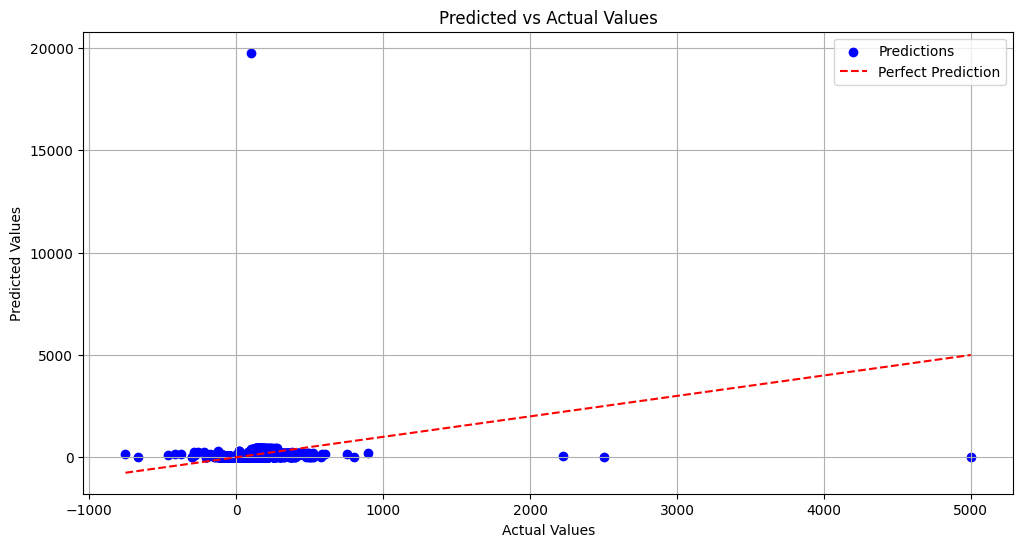

In [27]:
import matplotlib.pyplot as plt

# Plot Predicted vs Actual Values
plt.figure(figsize=(12, 6))

plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
import numpy as np
import pandas as pd

# Convert y_test and predictions to numpy arrays if they are pandas Series or DataFrames
if isinstance(y_test, pd.Series):
    y_test = y_test.values
if isinstance(predictions, pd.Series):
    predictions = predictions.values

# Ensure both are of the same data type
y_test = np.array(y_test, dtype=np.float32)
predictions = np.array(predictions, dtype=np.float32)

# Calculate residuals
residuals = y_test - predictions


MemoryError: Unable to allocate 1.63 TiB for an array with shape (669935, 669935) and data type float32

In [30]:
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


NameError: name 'residuals' is not defined

<Figure size 1200x600 with 0 Axes>

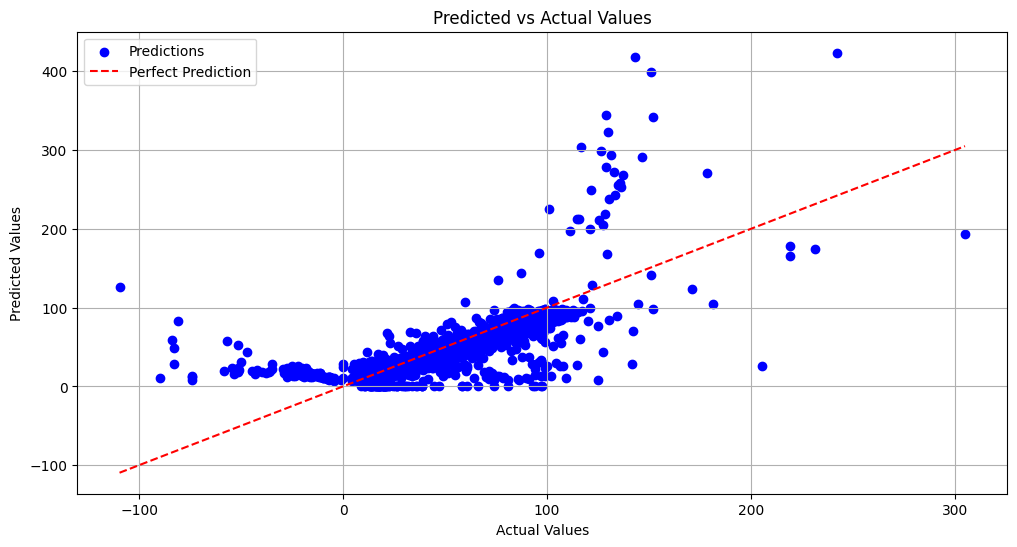

ValueError: x and y must be the same size

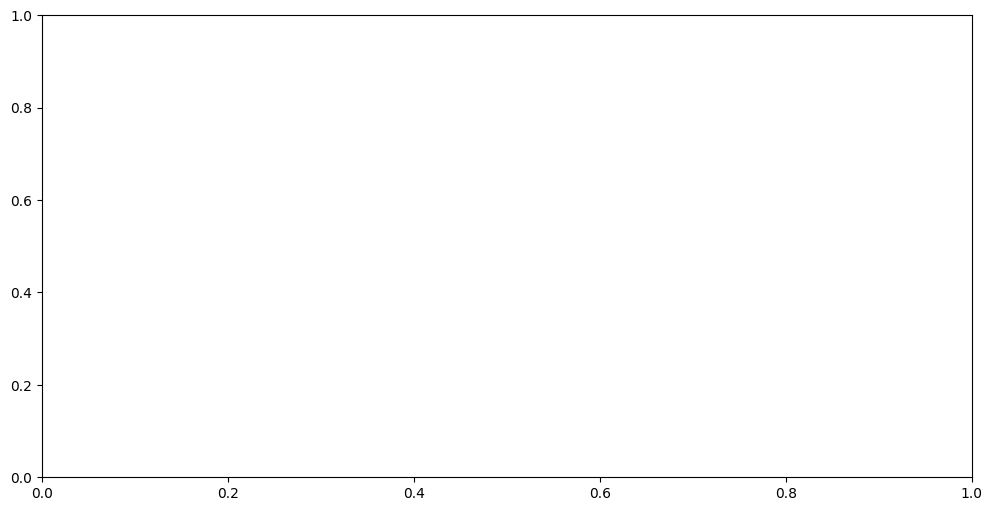

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming y_test and predictions are numpy arrays or pandas Series
sample_size = 10000  # Adjust this based on your available memory

# Ensure the sample size is less than the length of your data
sample_size = min(sample_size, len(y_test))

# Randomly sample the data
indices = np.random.choice(len(y_test), size=sample_size, replace=False)
sample_y_test = y_test[indices]
sample_predictions = predictions[indices]
sample_residuals = sample_y_test - sample_predictions

# 1. Plot Predicted vs Actual Values
plt.figure(figsize=(12, 6))
plt.scatter(sample_y_test, sample_predictions, color='blue', label='Predictions')
plt.plot([min(sample_y_test), max(sample_y_test)], [min(sample_y_test), max(sample_y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot Residuals
plt.figure(figsize=(12, 6))
plt.scatter(sample_predictions, sample_residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

# 3. Plot Histogram of Residuals
plt.figure(figsize=(12, 6))
plt.hist(sample_residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [33]:
print(x)

         VendorID  pickup_hour  drop_hour  trip_distance  passenger_count  \
0               2            0          1           1.72              1.0   
1               1            0          0           1.80              1.0   
2               1            0          0           4.70              1.0   
3               1            0          0           1.40              1.0   
4               1            0          0           0.80              1.0   
...           ...          ...        ...            ...              ...   
3513391         2           23         23           7.68              1.0   
3513392         2           23         23           3.51              1.0   
3513393         2           23         23           3.36              1.0   
3513394         1           23         23           3.30              3.0   
3513396         2           23         23           1.58              1.0   

         PULocationID  DOLocationID  payment_type  Condition_Code  
0      